<a href="https://colab.research.google.com/github/Patiencewantae123/BIONICS-trainemodel/blob/main/BIONICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EMG Signal: 0.65 -> Limb angle: 58.06 degrees
EMG Signal: 0.10 -> Limb angle: 8.99 degrees


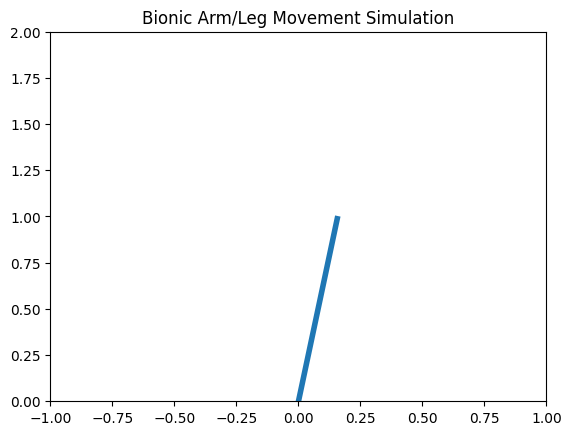

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Simulate EMG signal generator (Electromyography)
def generate_emg_signal():
    """Simulate an EMG signal which mimics muscle activation."""
    return np.random.rand()

# Limb movement based on EMG signal
def calculate_limb_position(emg_signal):
    """Calculate the limb position based on the EMG signal (simple mapping)."""
    max_position = 90  # 90 degrees, maximum arm or leg bend
    return emg_signal * max_position

# Initialize a plot for visualizing the limb movement
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.set_title("Bionic Arm/Leg Movement Simulation")

# Create a line representing the arm or leg
line, = ax.plot([], [], lw=4)

# Update the plot based on the new limb position
def update(frame):
    emg_signal = generate_emg_signal()  # Get a new EMG signal
    angle = calculate_limb_position(emg_signal)  # Calculate limb position

    # Calculate the x and y coordinates of the limb
    x = [0, np.sin(np.deg2rad(angle))]
    y = [0, np.cos(np.deg2rad(angle))]

    # Update the line data
    line.set_data(x, y)

    # Print out the angle of the limb (debugging)
    print(f"EMG Signal: {emg_signal:.2f} -> Limb angle: {angle:.2f} degrees")
    return line,

# Animate the limb movement
ani = FuncAnimation(fig, update, frames=range(100), blit=True, repeat=False)

# Display the simulation
plt.show()


Classification accuracy: 94.50%
EMG Signal: 0.17 -> Activity: 0 -> Limb angle: 20 degrees
EMG Signal: 0.10 -> Activity: 0 -> Limb angle: 20 degrees


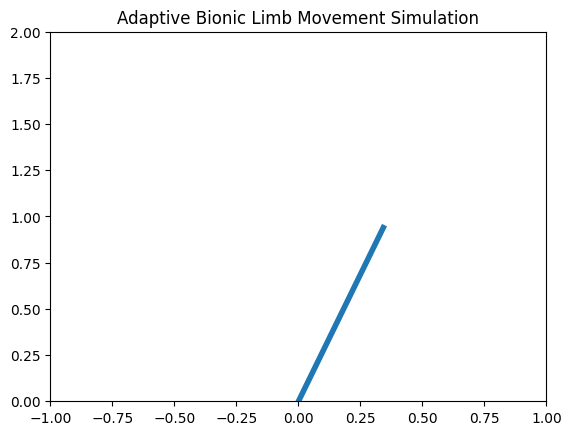

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Step 1: Generate Simulated EMG Data
def generate_emg_dataset(num_samples=1000):
    """Simulate EMG dataset for 3 activity levels: 0 (resting), 1 (walking), 2 (lifting)."""
    np.random.seed(42)

    resting = np.random.normal(loc=0.2, scale=0.05, size=(num_samples//3,))
    walking = np.random.normal(loc=0.5, scale=0.1, size=(num_samples//3,))
    lifting = np.random.normal(loc=0.8, scale=0.1, size=(num_samples//3,))

    X = np.hstack([resting, walking, lifting])
    y = np.array([0]*(num_samples//3) + [1]*(num_samples//3) + [2]*(num_samples//3))  # Labels: 0, 1, 2

    return X.reshape(-1, 1), y

# Step 2: Train a Logistic Regression Classifier
X, y = generate_emg_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

# Test accuracy
accuracy = clf.score(X_test, y_test)
print(f"Classification accuracy: {accuracy * 100:.2f}%")

# Step 3: Define Control Logic Based on Classified Activity
def calculate_limb_position(activity_level):
    """Calculate limb position based on classified activity level."""
    if activity_level == 0:  # Resting
        return 20  # Slightly bent limb
    elif activity_level == 1:  # Walking
        return 45  # Normal walking bend
    elif activity_level == 2:  # Lifting
        return 90  # Fully bent limb for lifting
    else:
        return 0  # Default to straight limb

# Step 4: Real-time EMG Simulation and Limb Movement
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.set_title("Adaptive Bionic Limb Movement Simulation")

line, = ax.plot([], [], lw=4)

def update(frame):
    emg_signal = np.random.rand()  # Simulate a new EMG signal
    activity_level = clf.predict([[emg_signal]])[0]  # Classify the activity
    angle = calculate_limb_position(activity_level)  # Adjust limb position

    # Calculate the x and y coordinates of the limb
    x = [0, np.sin(np.deg2rad(angle))]
    y = [0, np.cos(np.deg2rad(angle))]

    # Update the line data
    line.set_data(x, y)

    # Display information about the classified activity
    print(f"EMG Signal: {emg_signal:.2f} -> Activity: {activity_level} -> Limb angle: {angle} degrees")
    return line,

# Animate the adaptive limb movement
ani = FuncAnimation(fig, update, frames=range(100), blit=True, repeat=False)

# Display the simulation
plt.show()


Arm/Leg is simulating a lifting action.
Arm/Leg is in Resting position.
Arm/Leg is simulating a lifting action.
Arm/Leg is simulating walking motion.
Arm/Leg is simulating a lifting action.
Arm/Leg is simulating walking motion.
Arm/Leg is simulating a lifting action.
Arm/Leg is simulating a lifting action.
Arm/Leg is simulating walking motion.
Arm/Leg is simulating walking motion.
Arm/Leg is in Resting position.
Arm/Leg is in Resting position.
Arm/Leg is simulating walking motion.
Arm/Leg is in Resting position.
Arm/Leg is simulating a lifting action.
Arm/Leg is simulating a lifting action.
Arm/Leg is simulating a lifting action.
Arm/Leg is in Resting position.
Arm/Leg is simulating walking motion.
Arm/Leg is simulating a lifting action.
Arm/Leg is simulating walking motion.
Arm/Leg is simulating walking motion.
Arm/Leg is in Resting position.
Arm/Leg is simulating a lifting action.
Arm/Leg is simulating walking motion.
Arm/Leg is in Resting position.
Arm/Leg is simulating a lifting ac

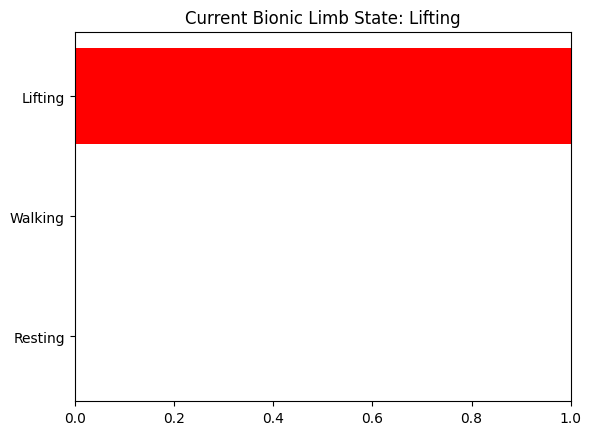

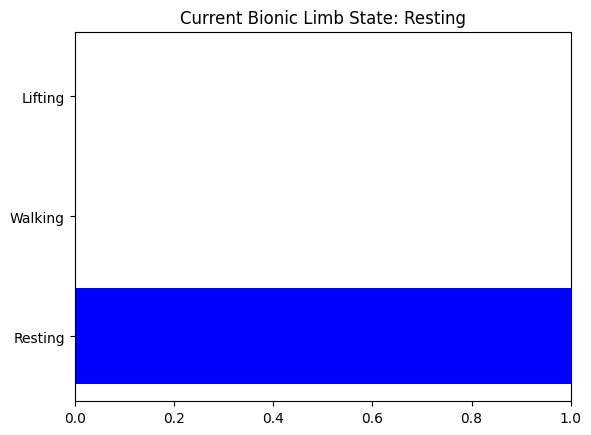

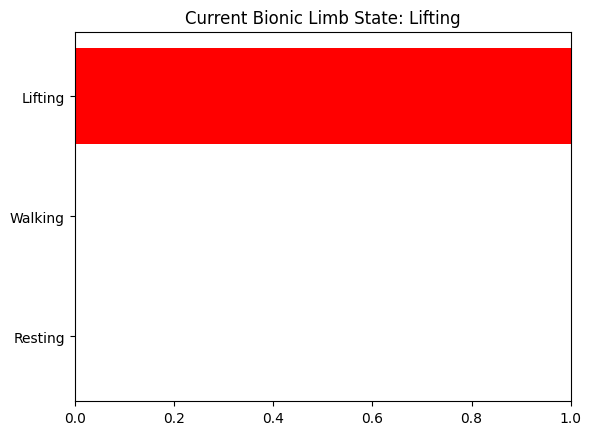

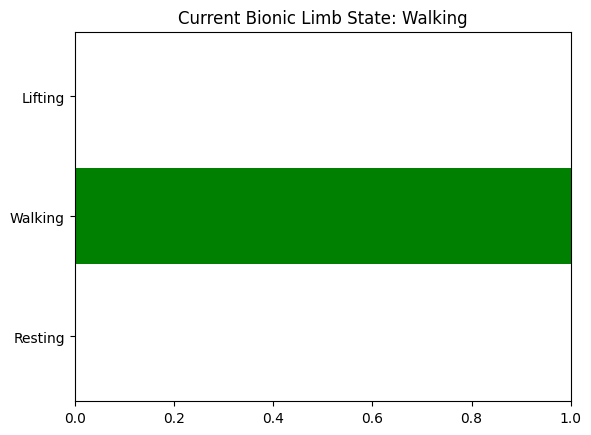

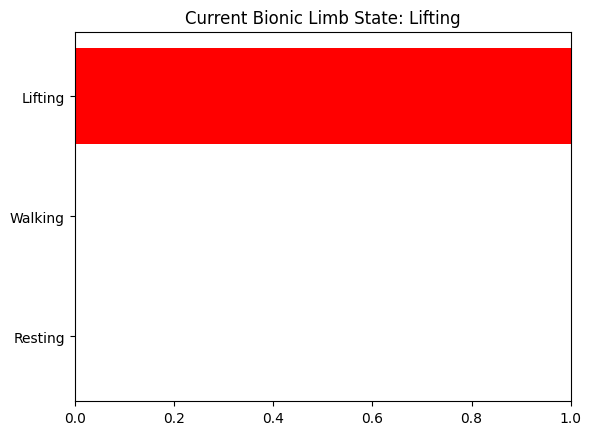

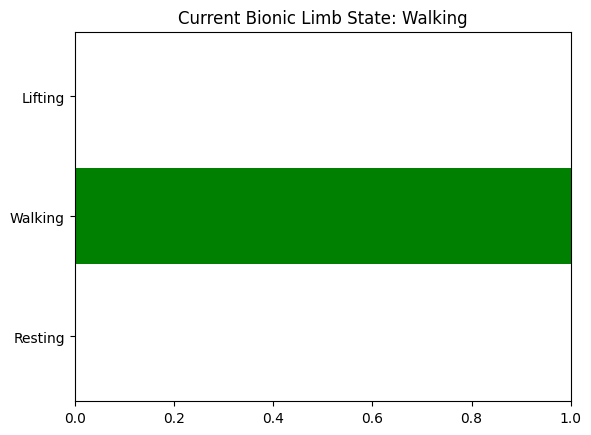

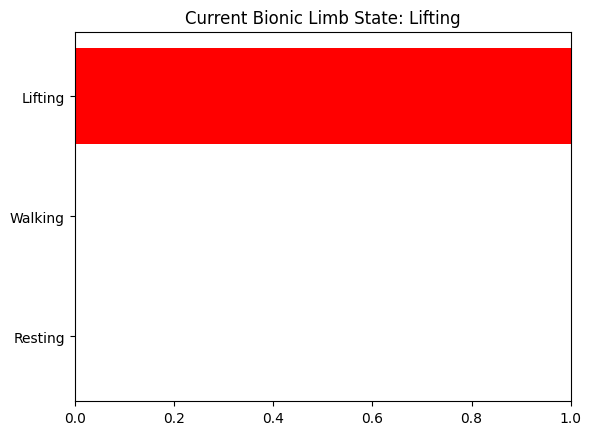

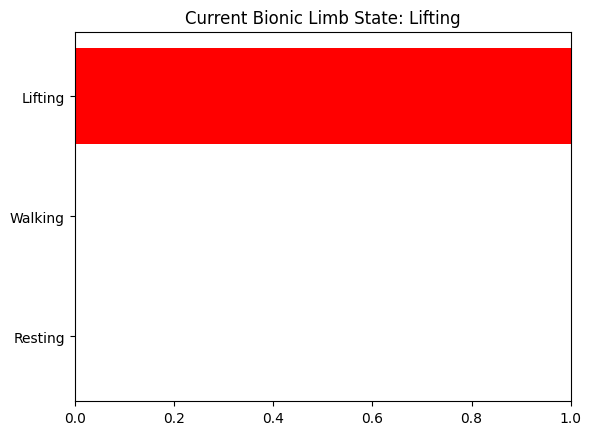

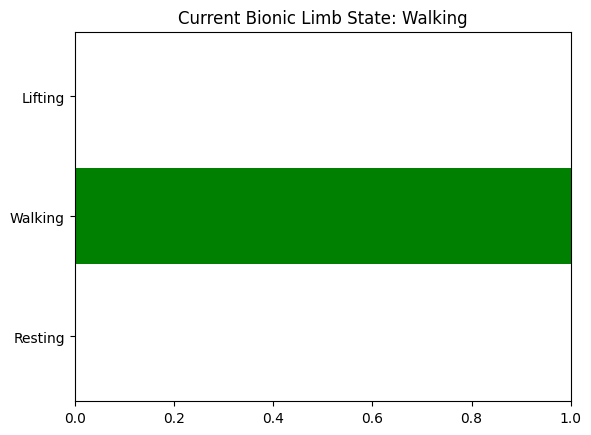

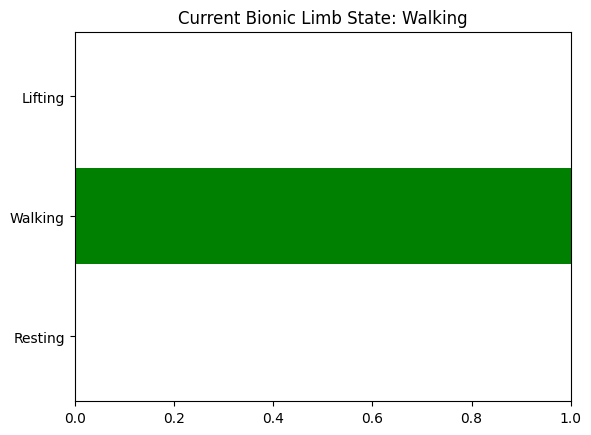

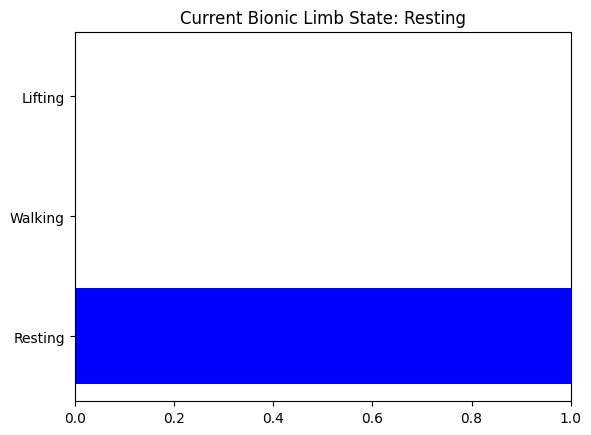

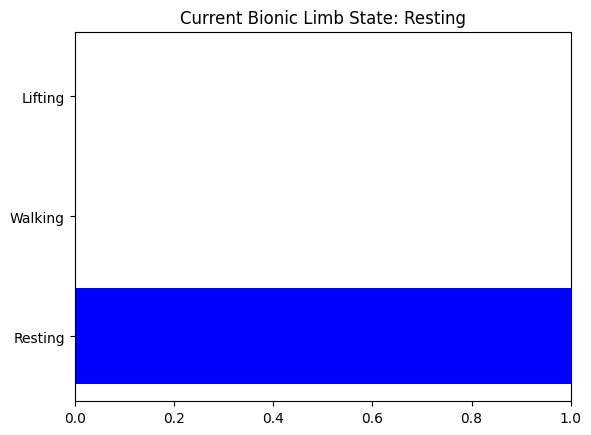

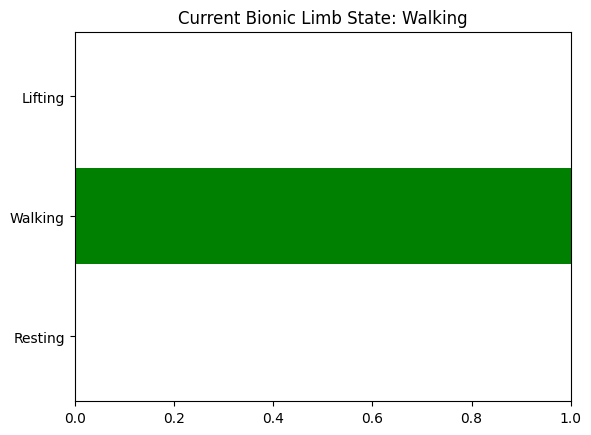

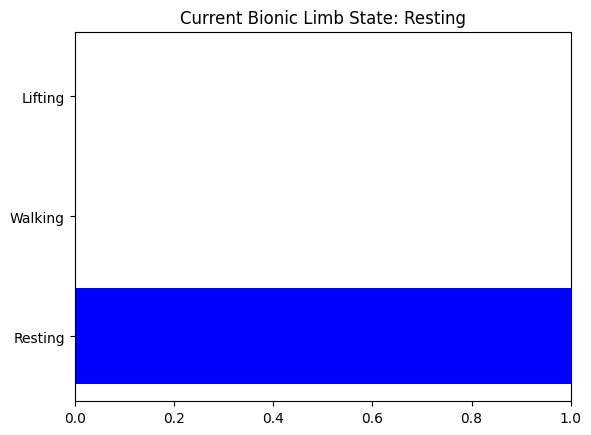

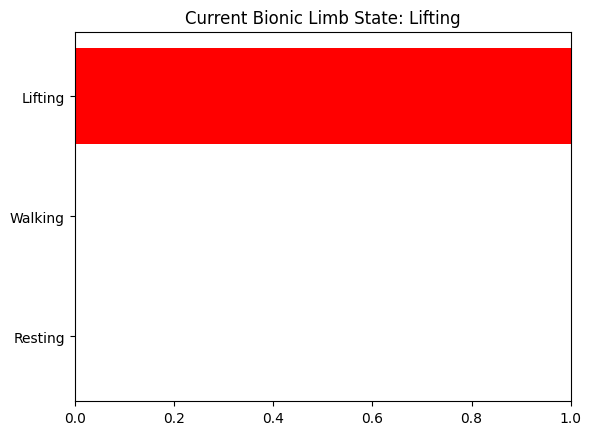

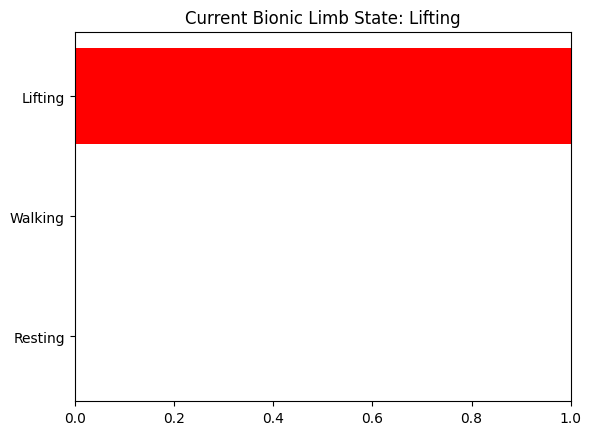

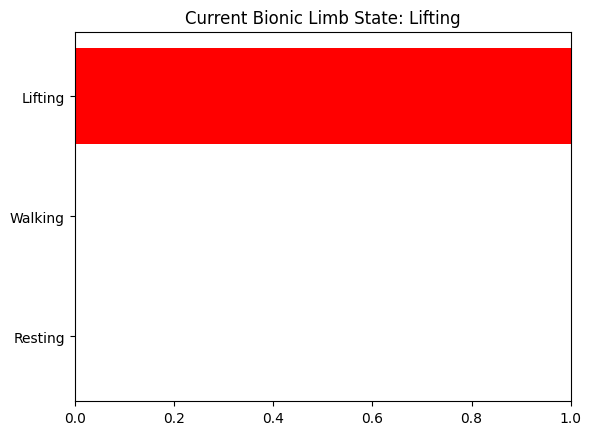

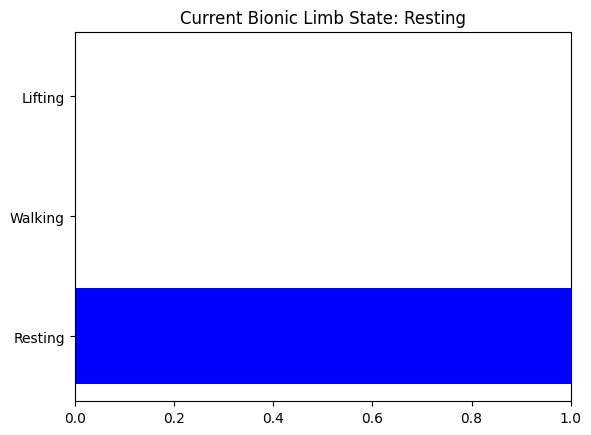

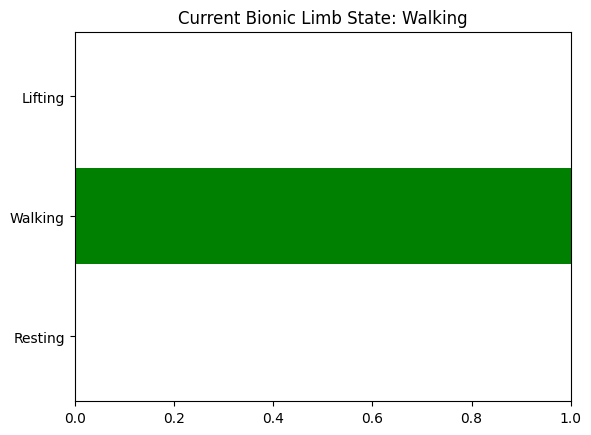

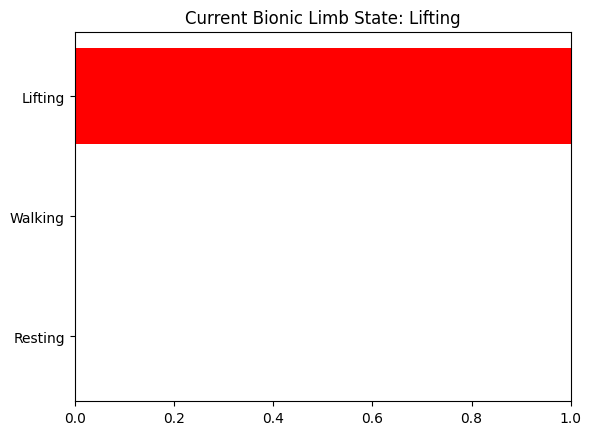

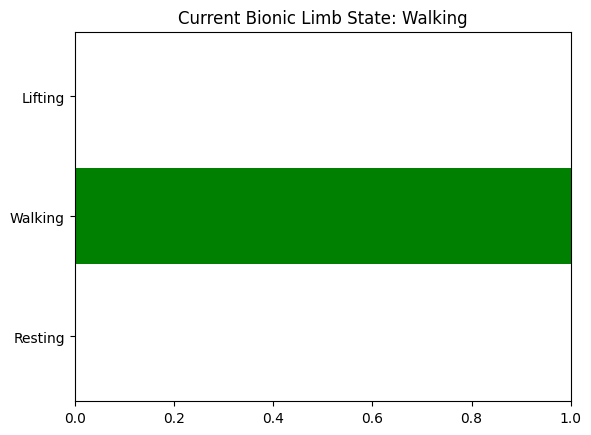

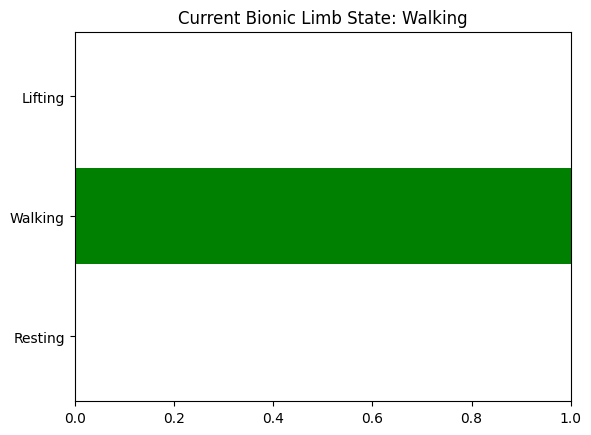

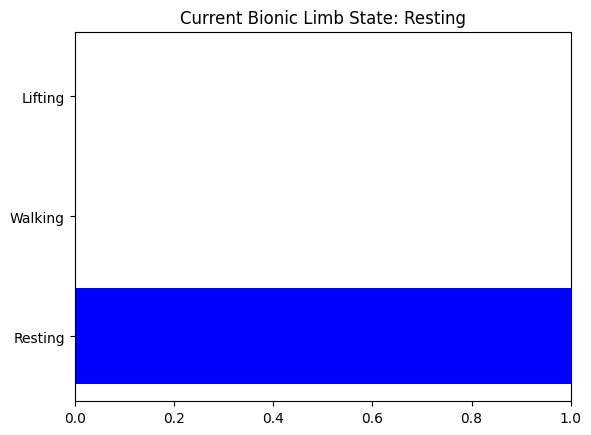

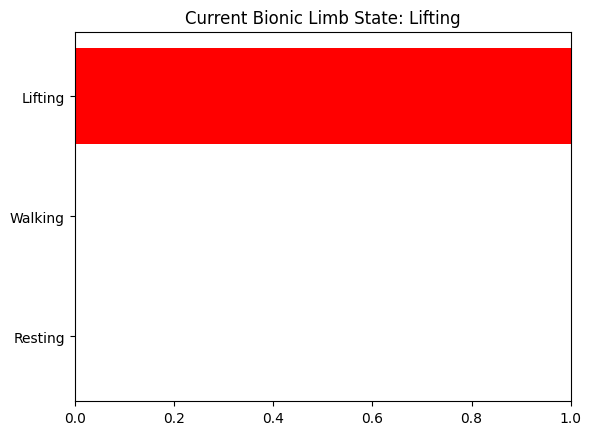

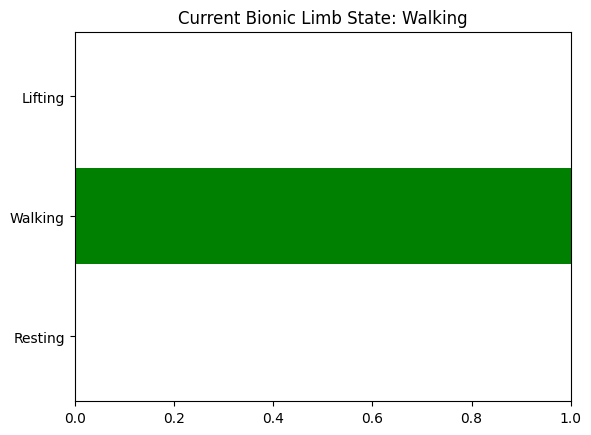

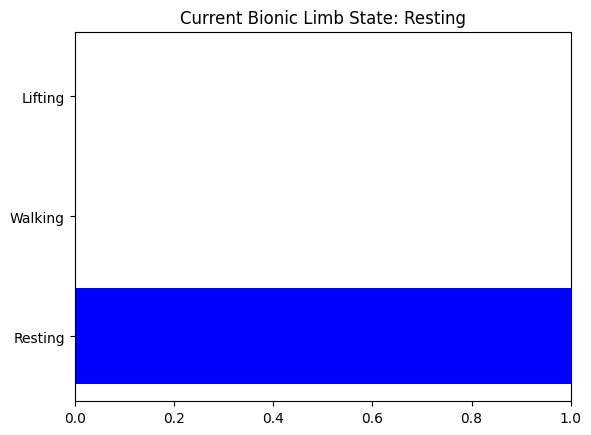

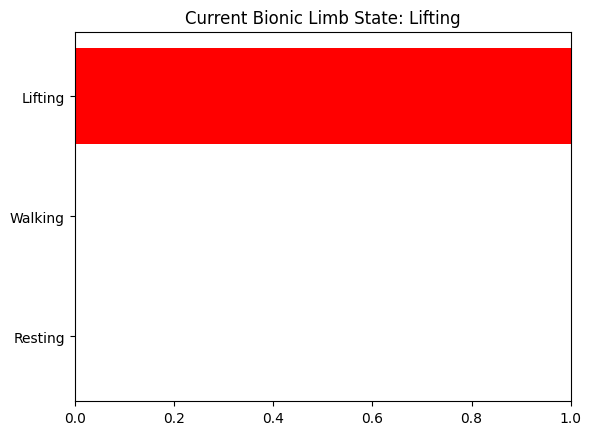

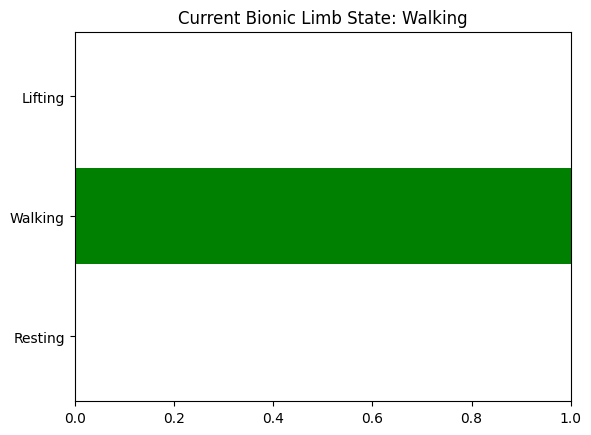

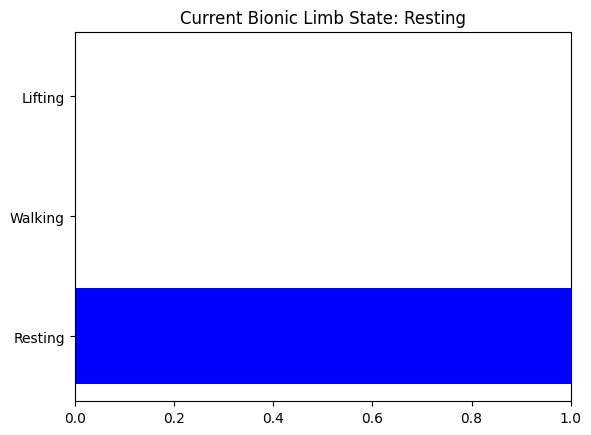

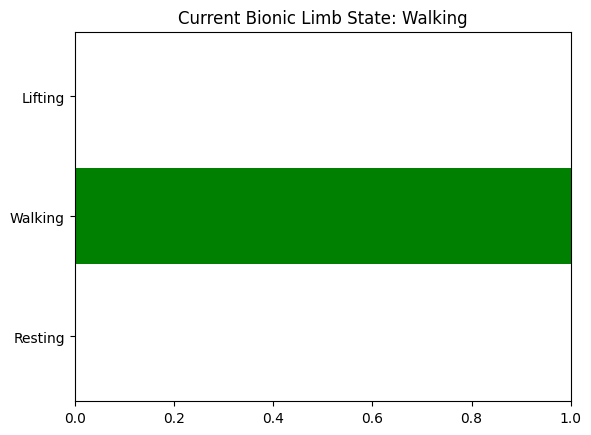

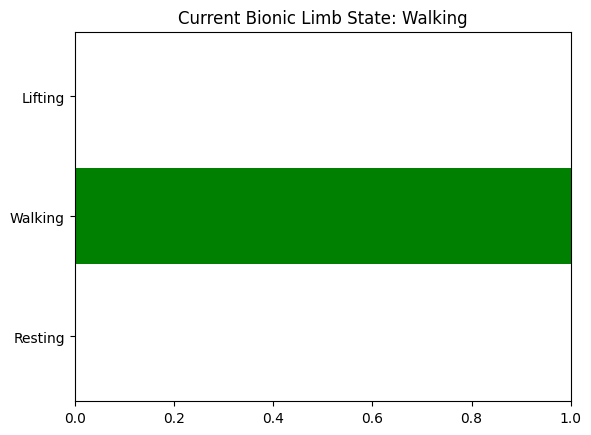

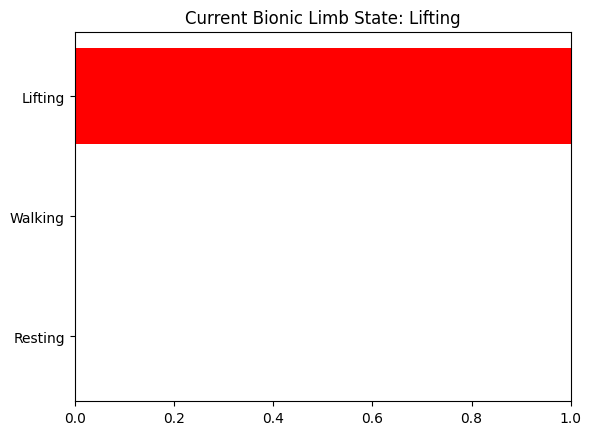

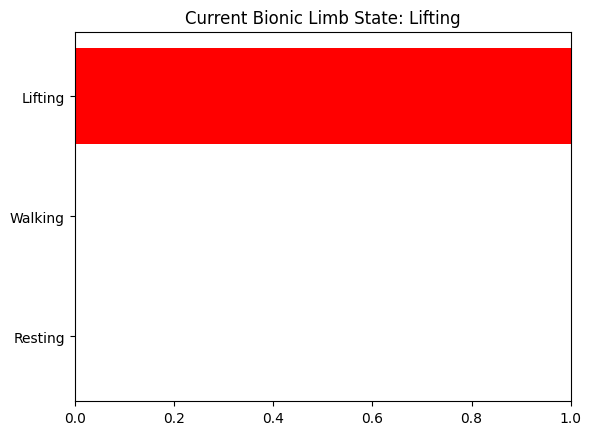

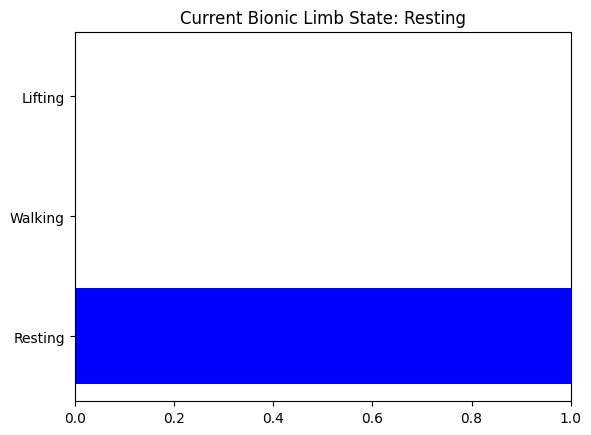

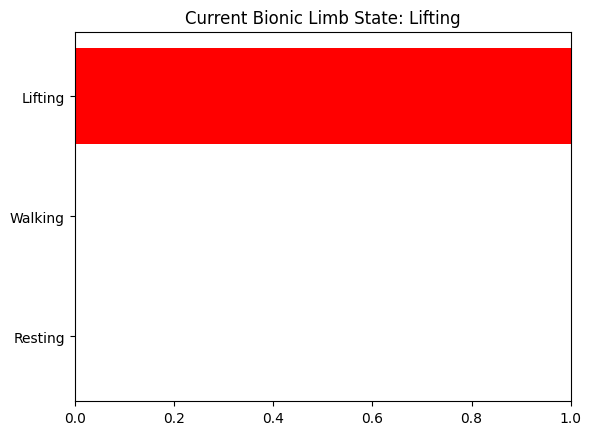

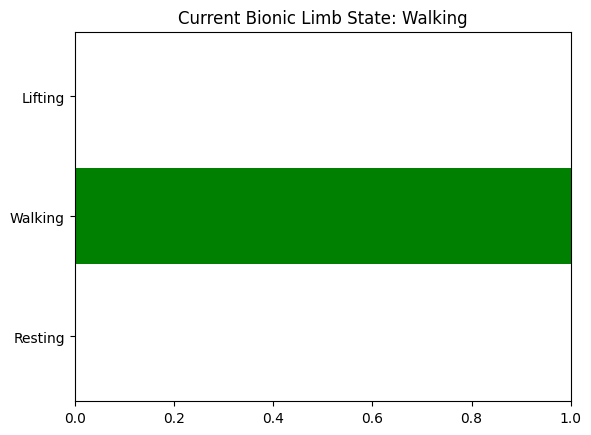

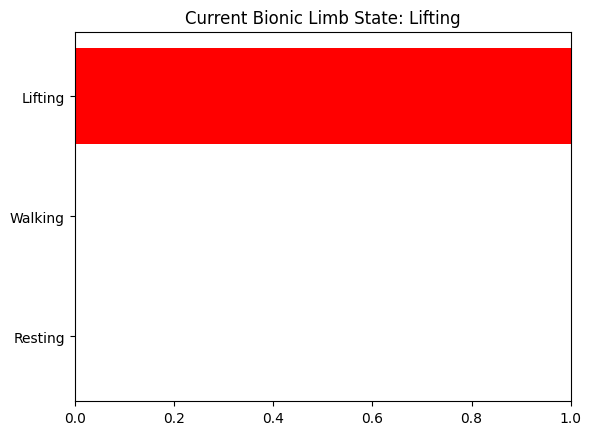

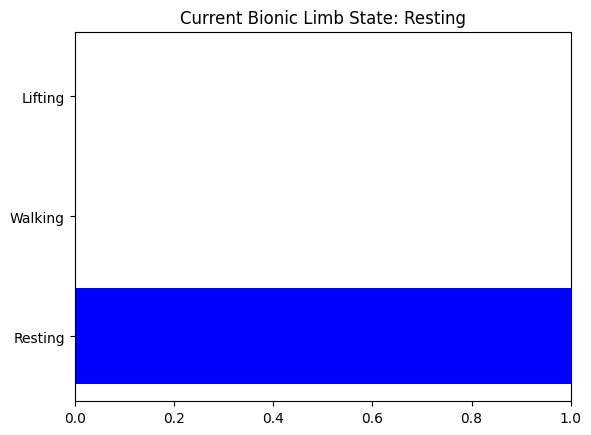

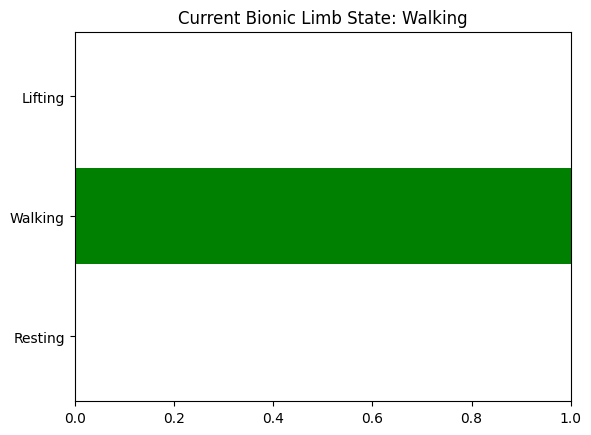

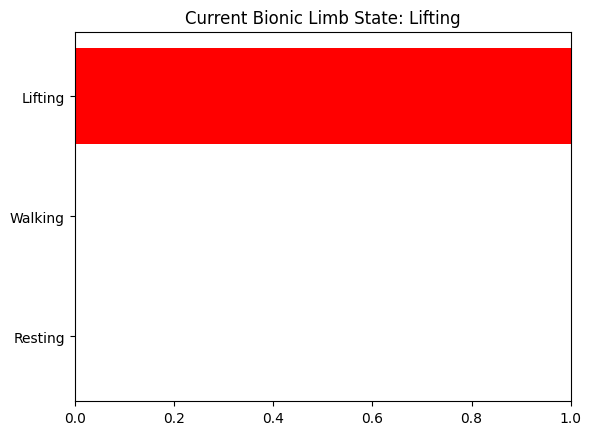

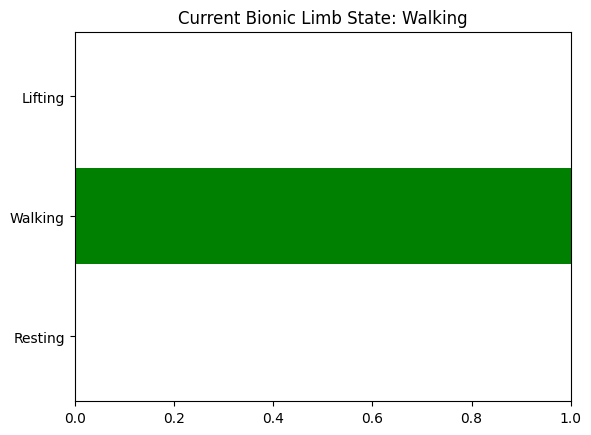

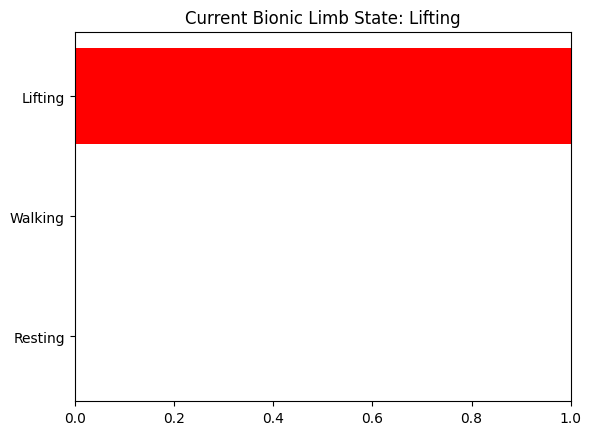

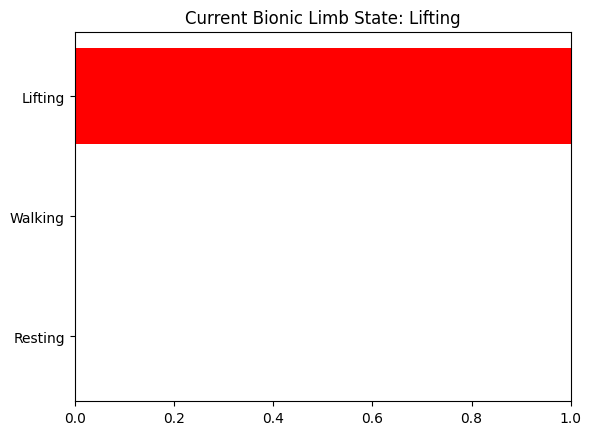

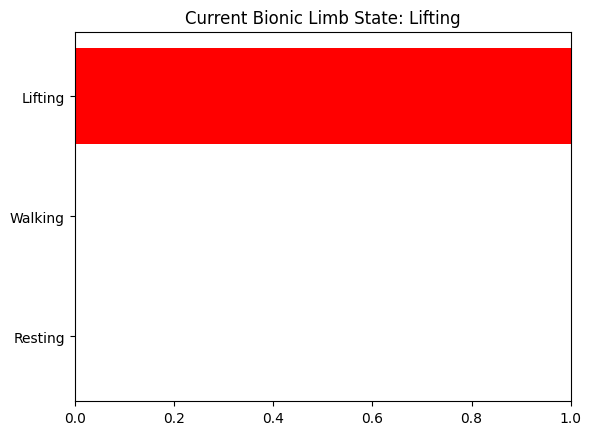

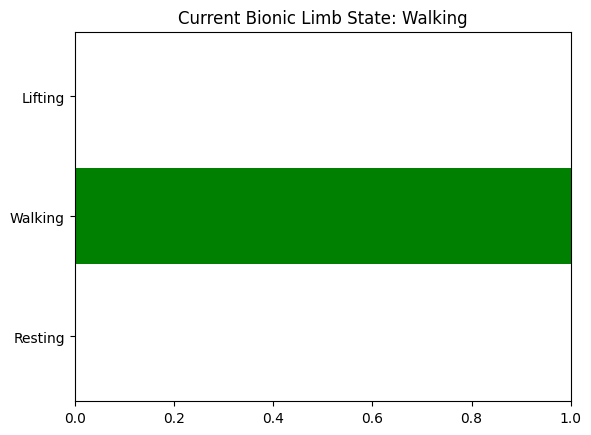

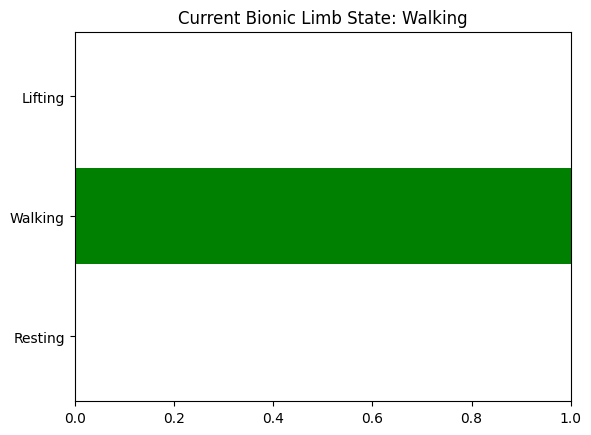

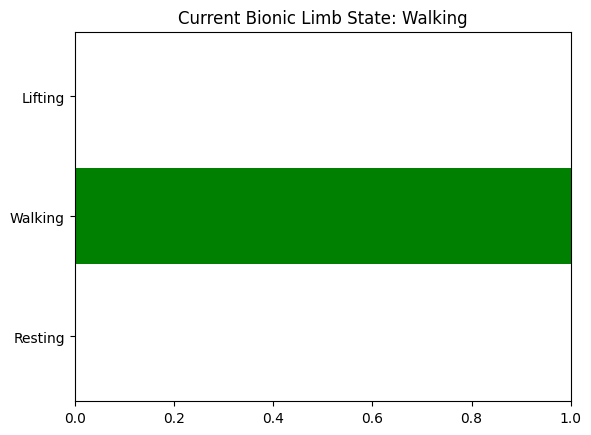

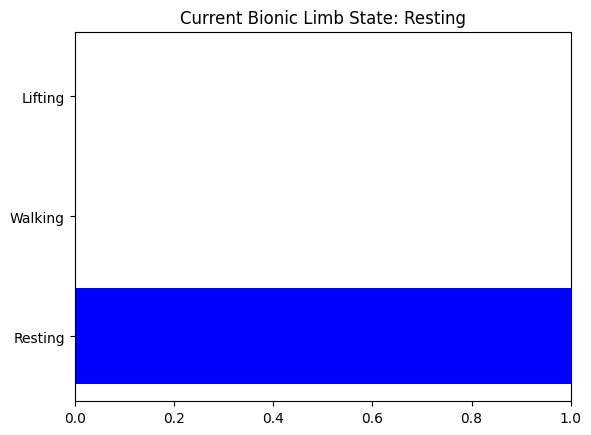

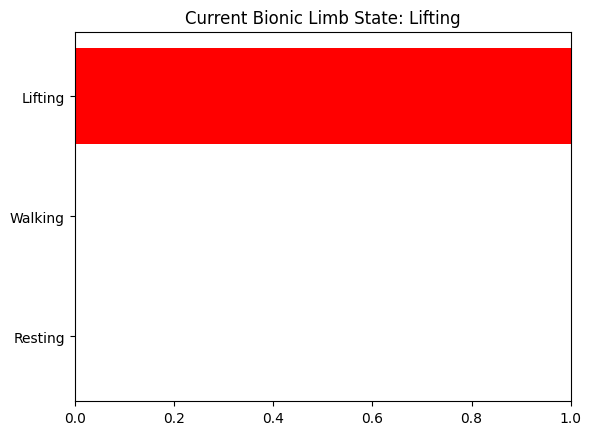

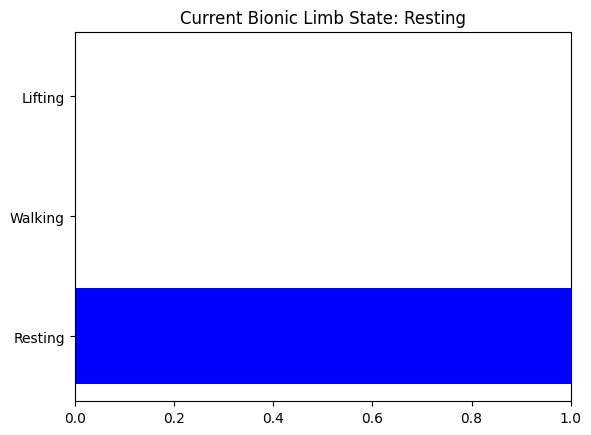

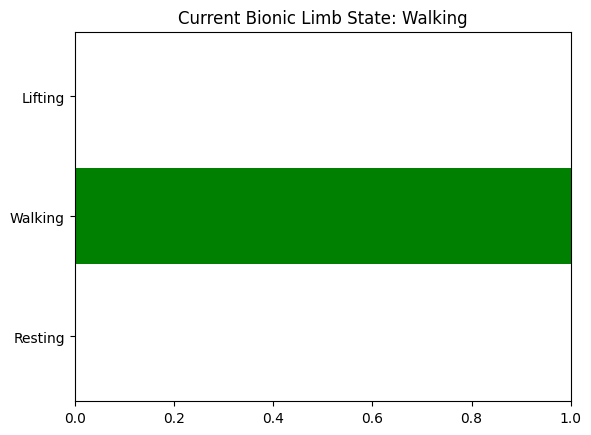

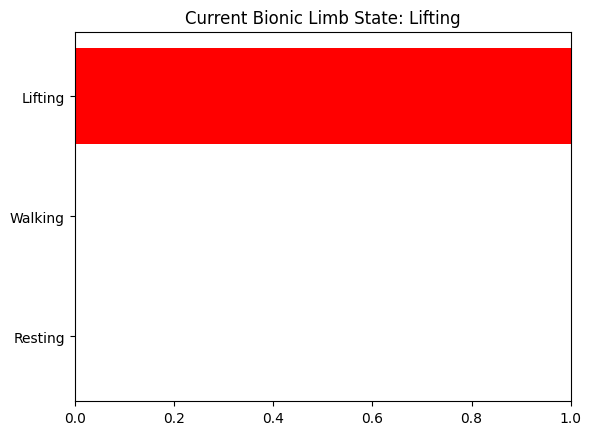

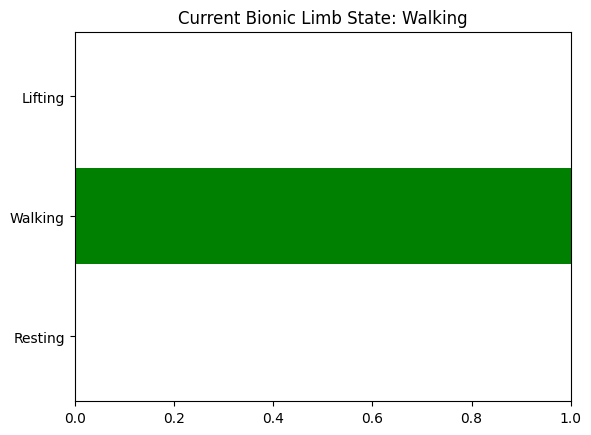

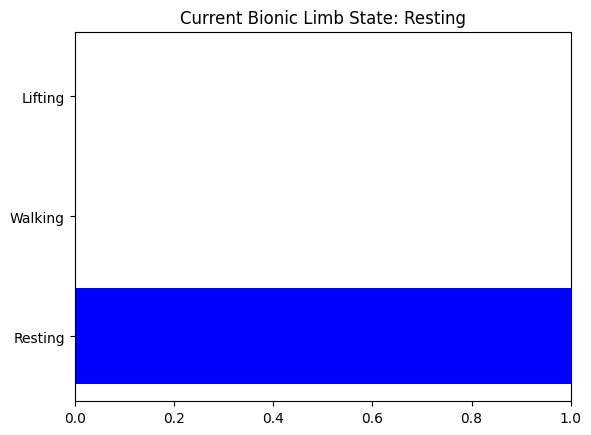

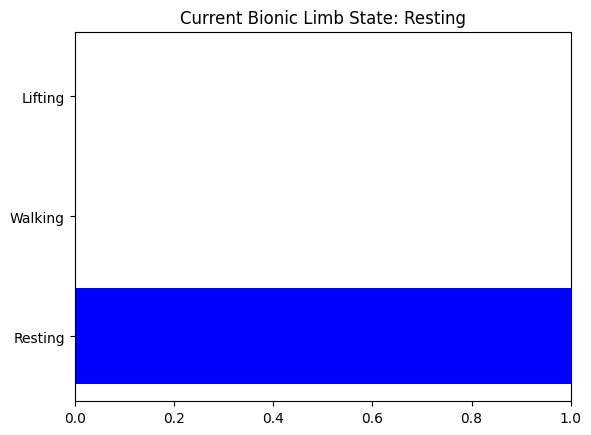

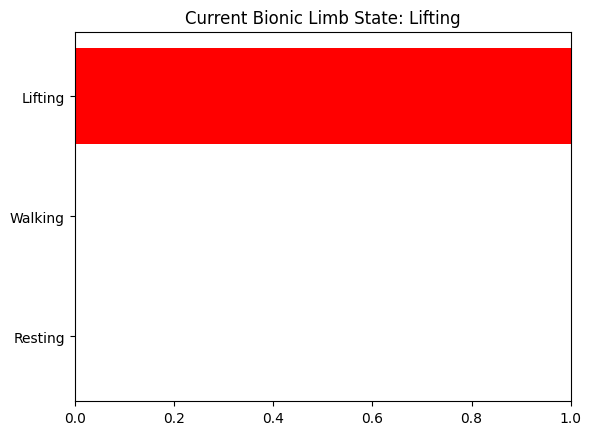

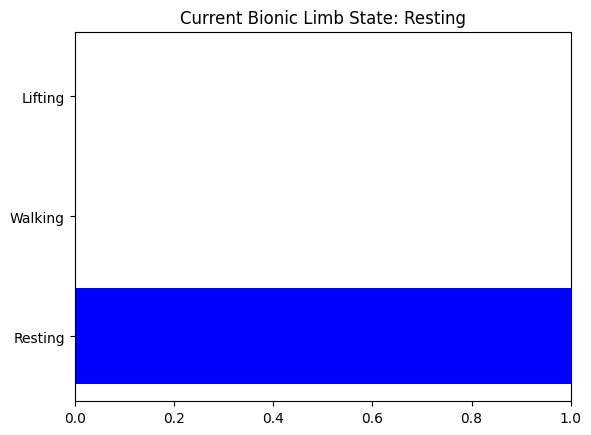

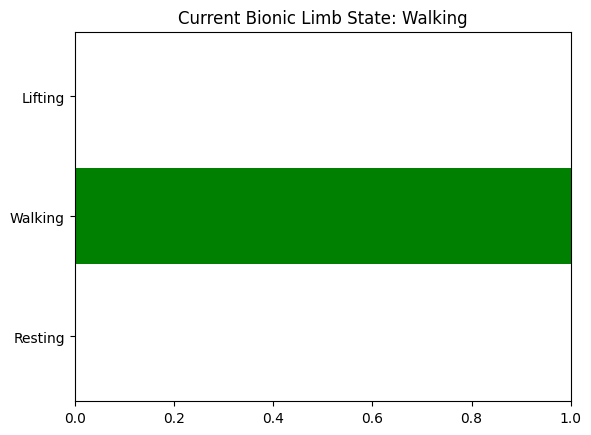

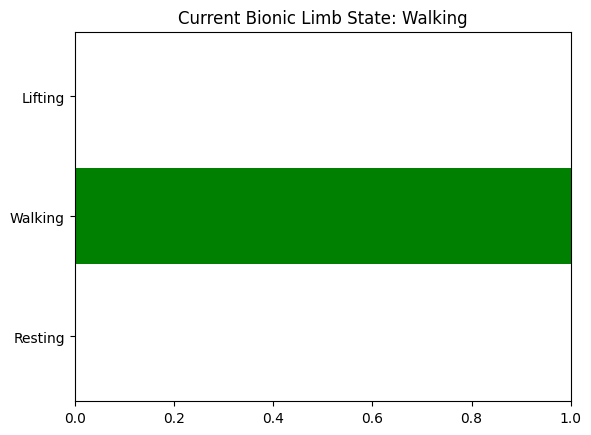

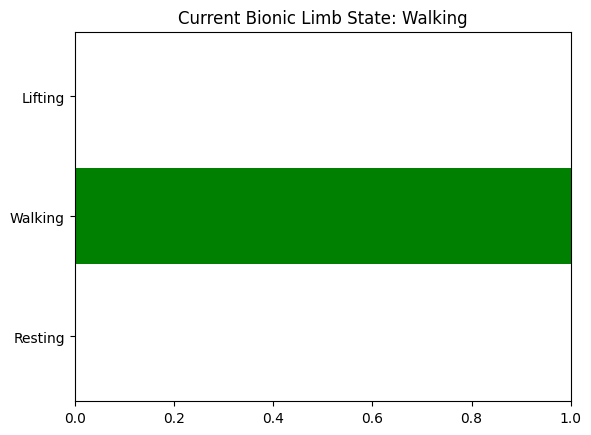

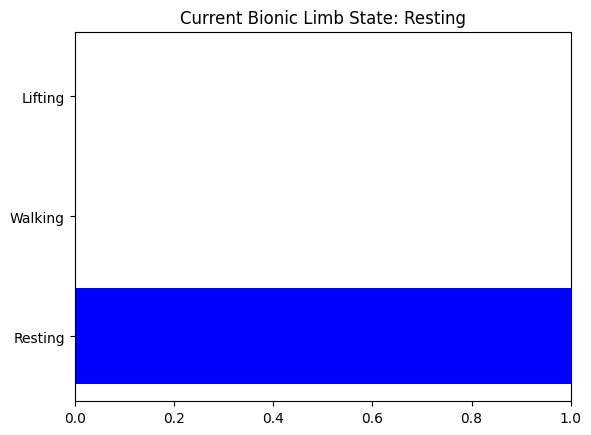

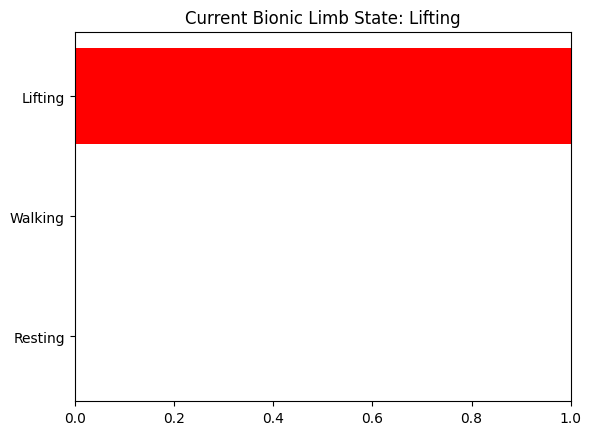

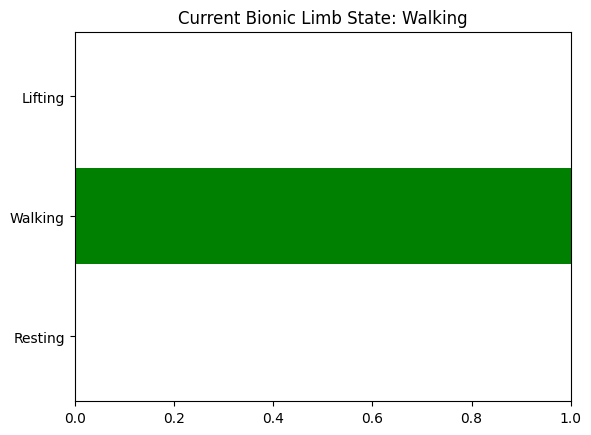

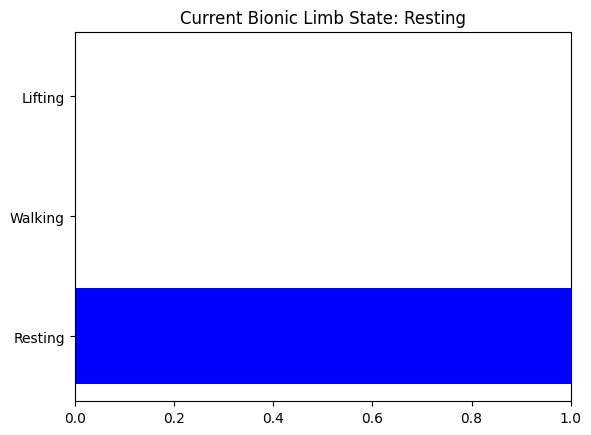

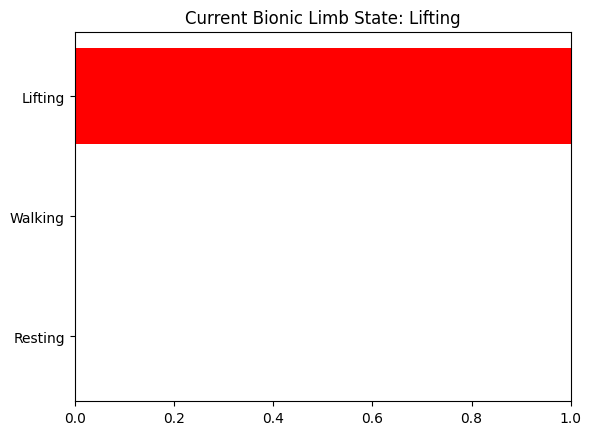

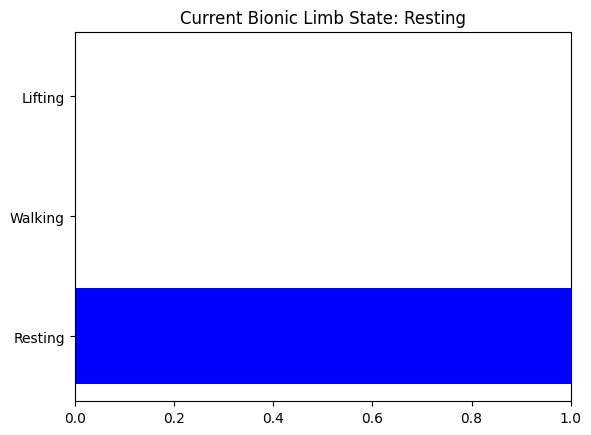

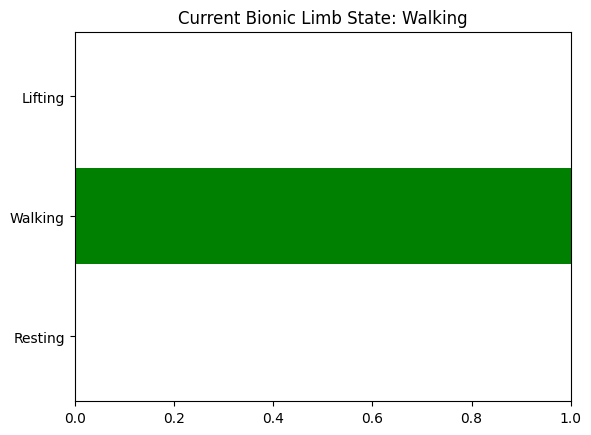

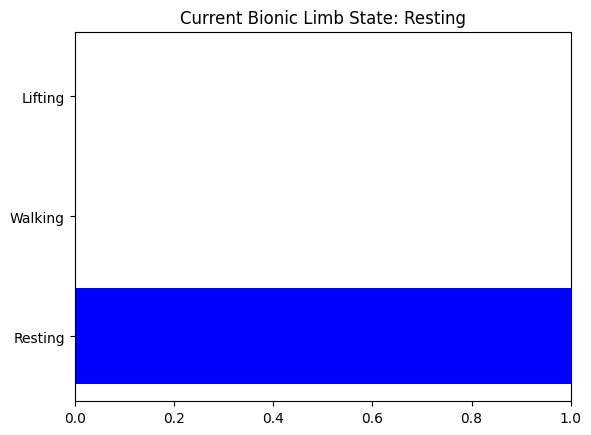

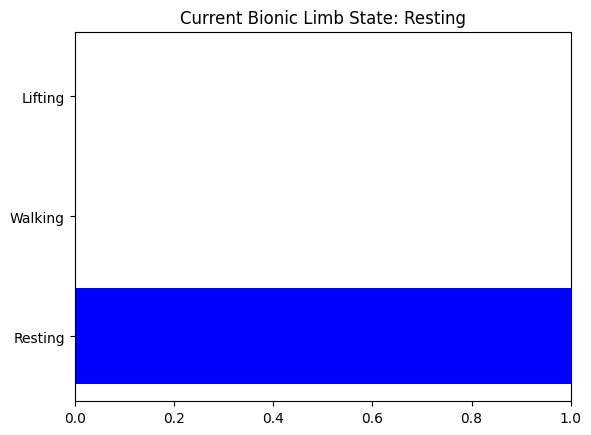

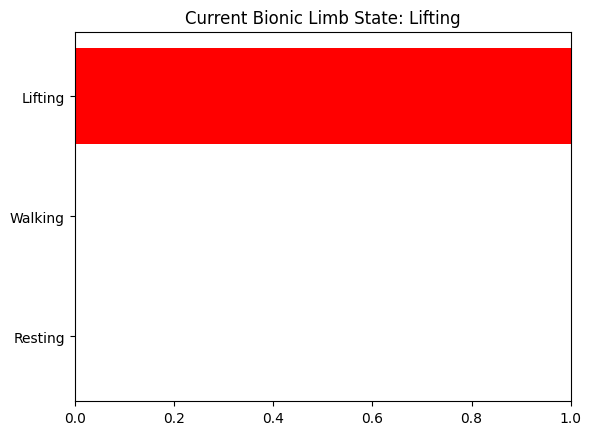

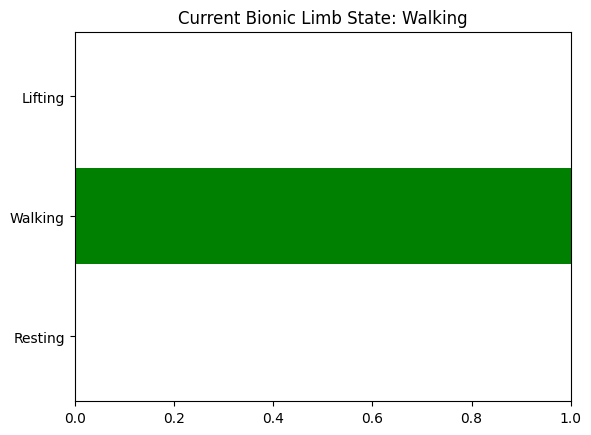

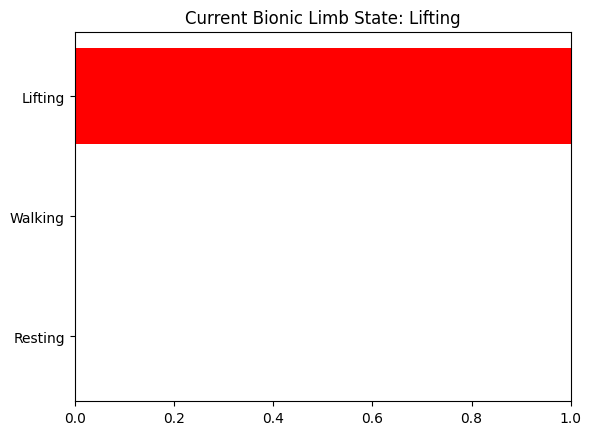

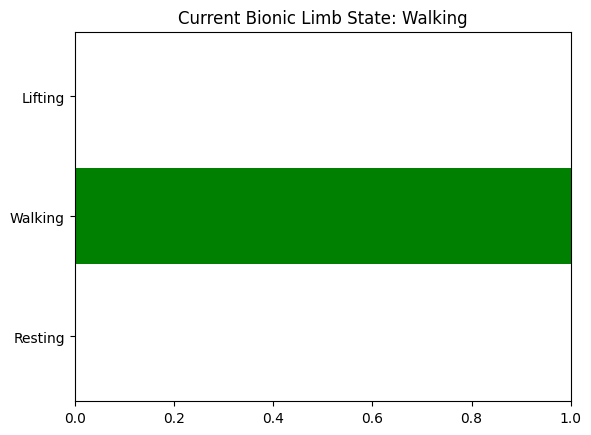

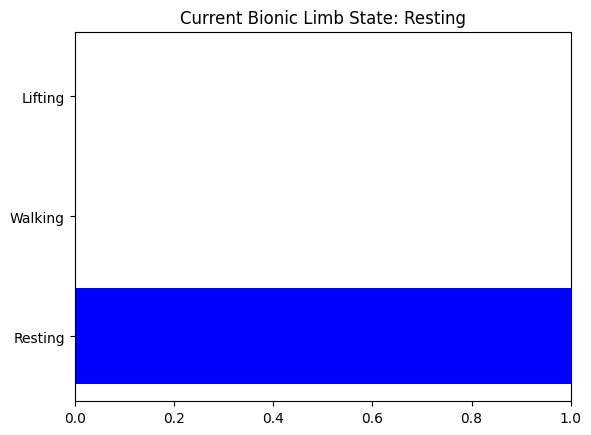

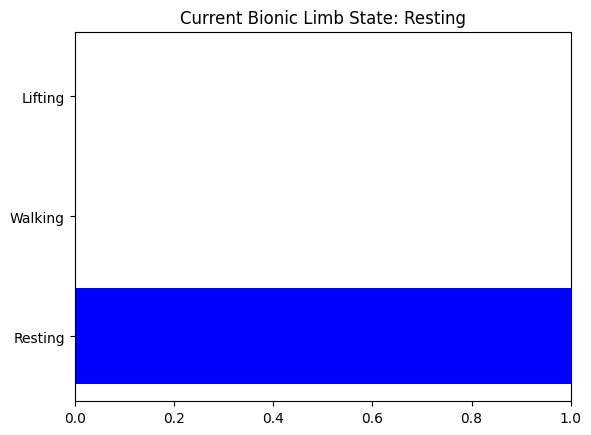

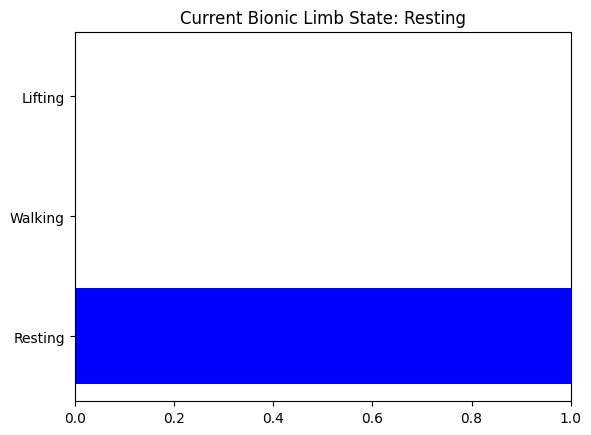

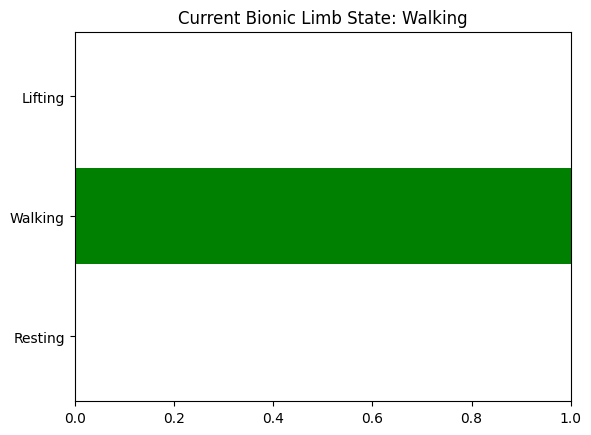

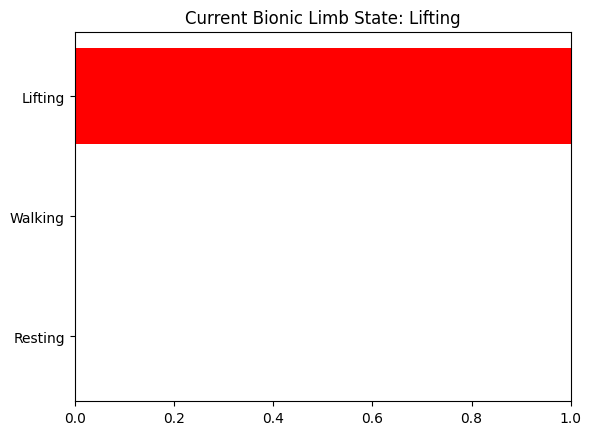

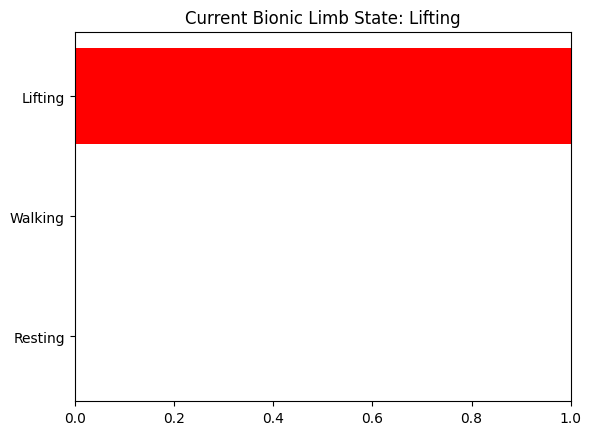

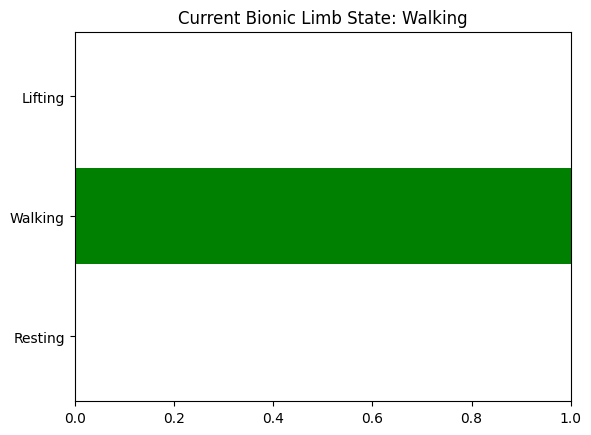

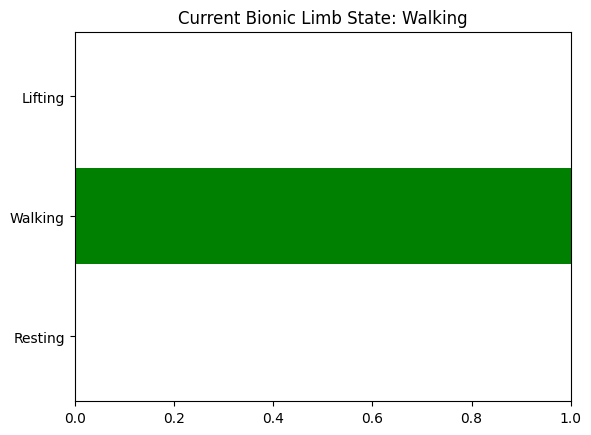

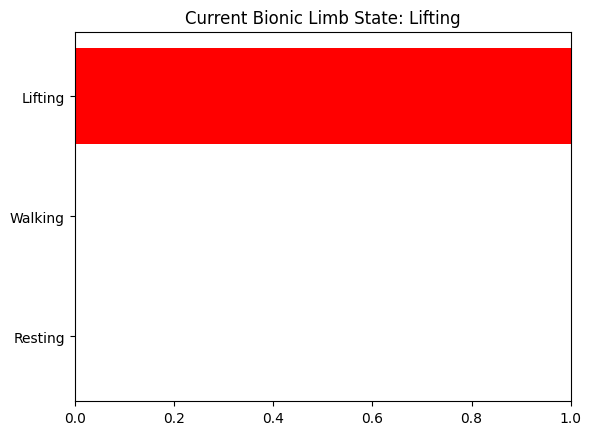

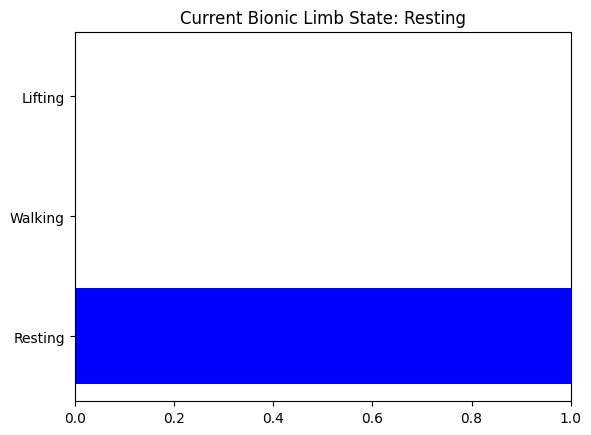

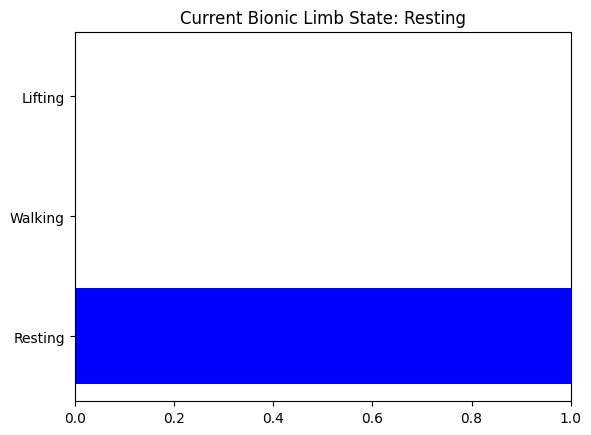

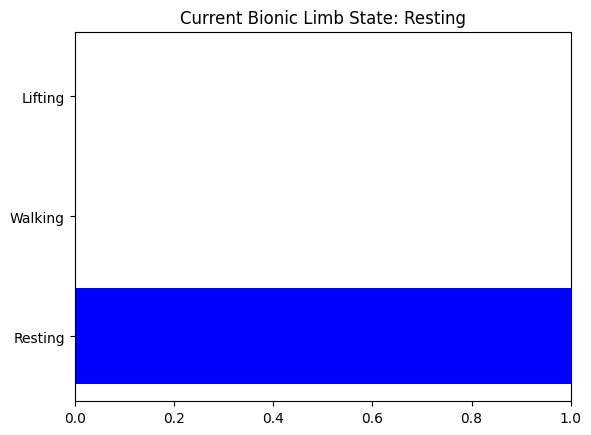

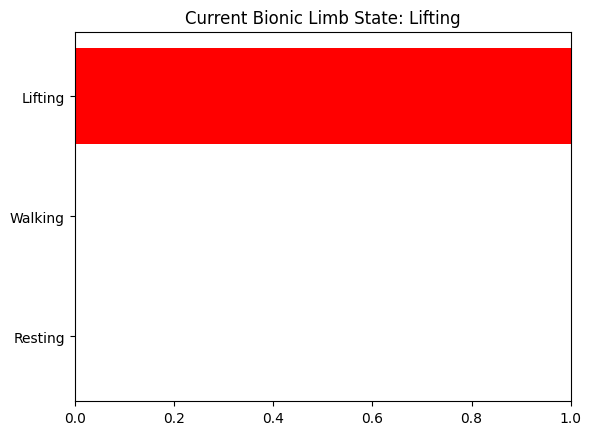

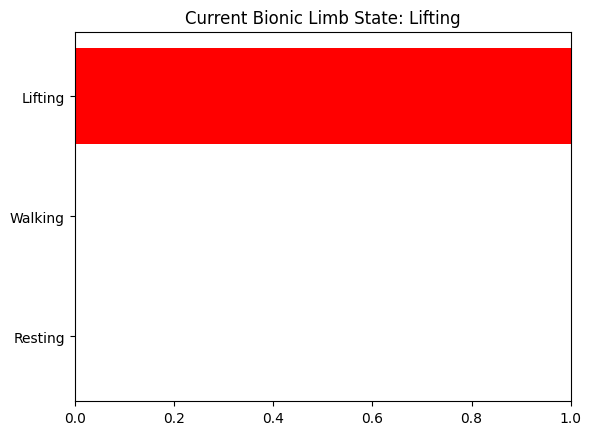

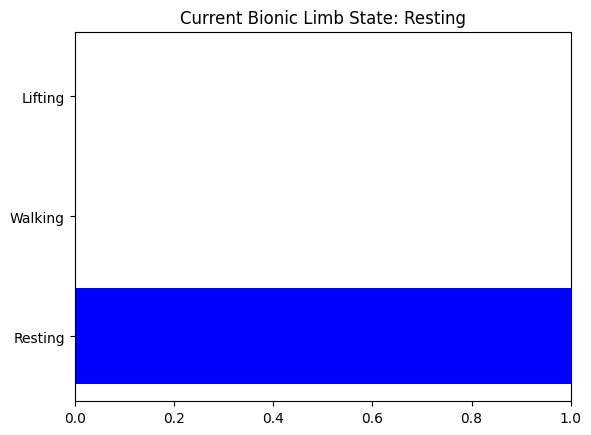

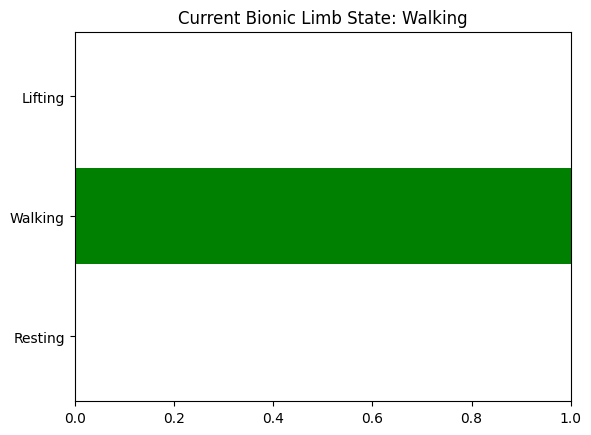

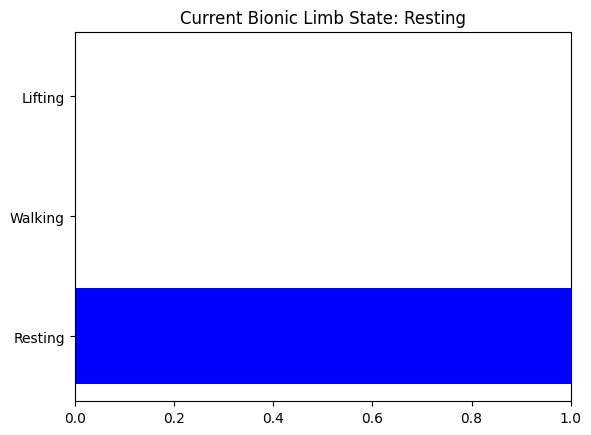

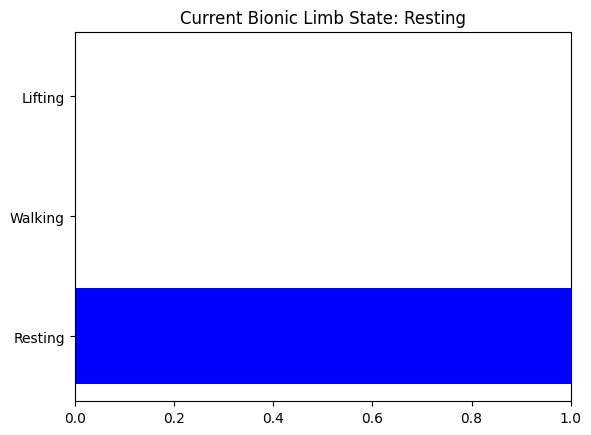

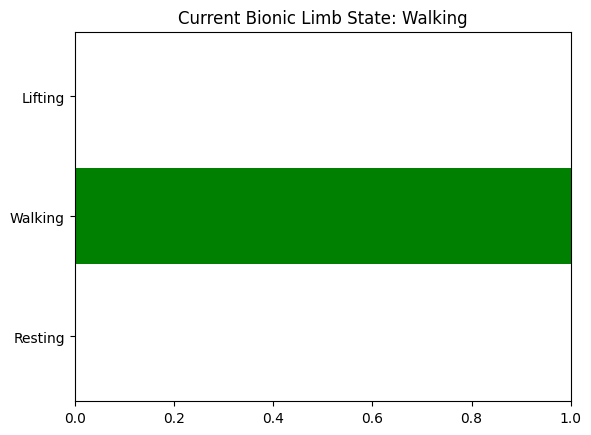

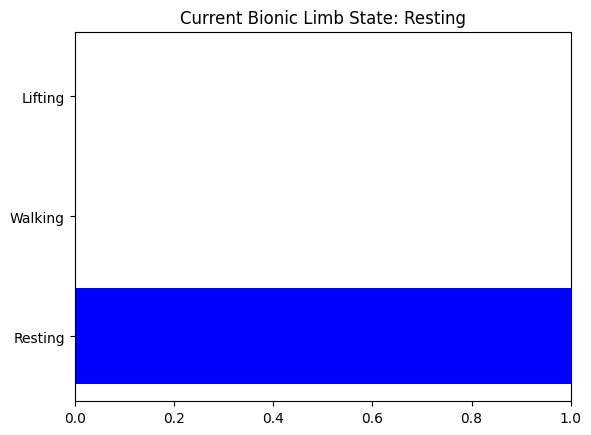

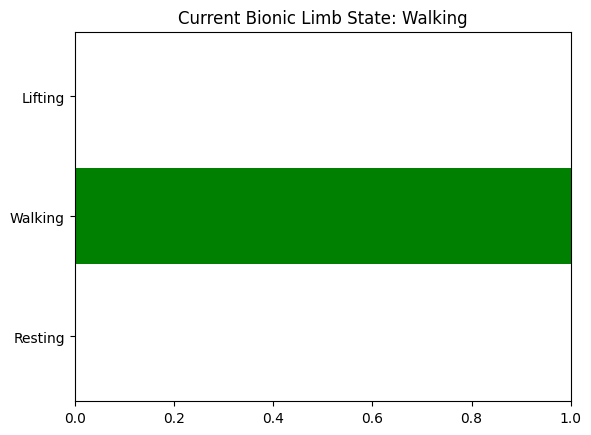

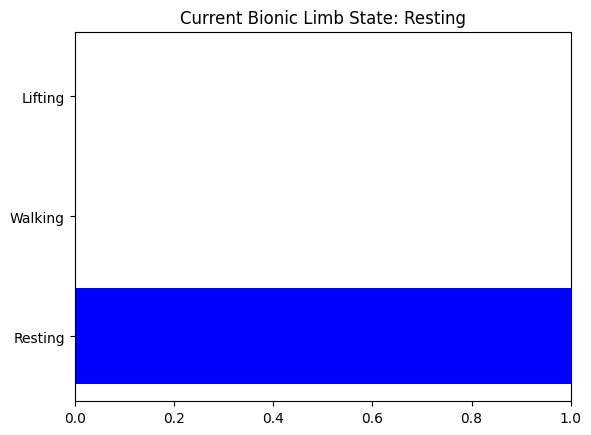

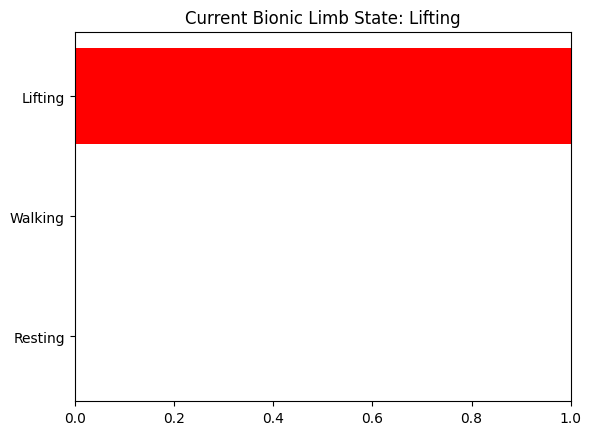

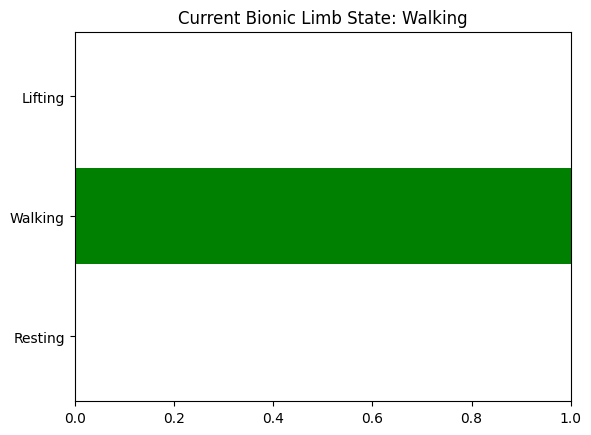

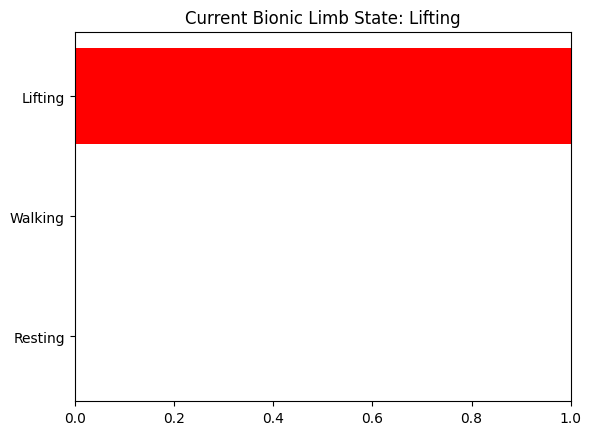

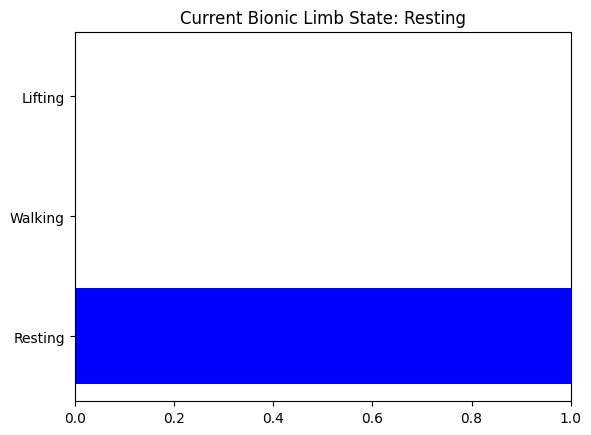

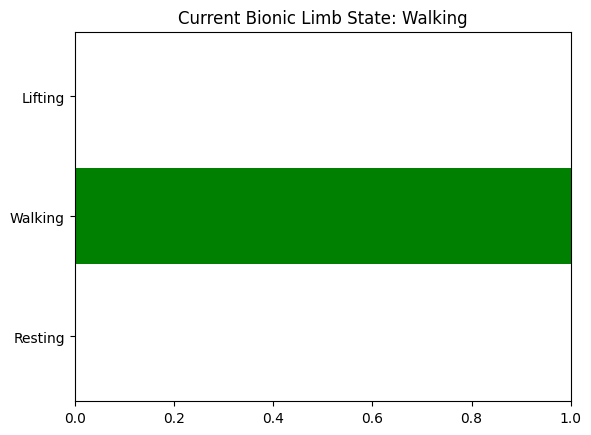

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

# Simulated EMG Signal Data (0 = Rest, 1 = Walk, 2 = Lift)
emg_signal = np.random.choice([0, 1, 2], size=100)

# State Definitions
state_dict = {0: 'Resting', 1: 'Walking', 2: 'Lifting'}

# Simulated Bionic Arm Class
class BionicLimb:
    def __init__(self):
        self.state = 'Resting'

    def process_emg(self, emg_value):
        self.state = state_dict.get(emg_value, 'Resting')
        self.perform_action()

    def perform_action(self):
        if self.state == 'Resting':
            print("Arm/Leg is in Resting position.")
        elif self.state == 'Walking':
            print("Arm/Leg is simulating walking motion.")
        elif self.state == 'Lifting':
            print("Arm/Leg is simulating a lifting action.")
        else:
            print("Unknown state detected.")

# Visualization for demonstration
def visualize_state(state_sequence):
    actions = ['Resting', 'Walking', 'Lifting']
    for i, state in enumerate(state_sequence):
        plt.clf()  # Clear the previous plot
        plt.barh(actions, [1 if actions[i] == state else 0 for i in range(len(actions))], color=['blue', 'green', 'red'])
        plt.title(f"Current Bionic Limb State: {state}")
        plt.xlim(0, 1)
        plt.pause(0.5)

    plt.show()

# Instantiate the Bionic Limb
bionic_limb = BionicLimb()

# Simulate Bionic Arm/Leg Control
states = []
for signal in emg_signal:
    bionic_limb.process_emg(signal)
    states.append(bionic_limb.state)
    sleep(0.1)

# Visualize the state transitions
visualize_state(states)


In [ ]:
!pip install matplotlib imageio


<ipython-input-1-4a1ef09a42aa>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


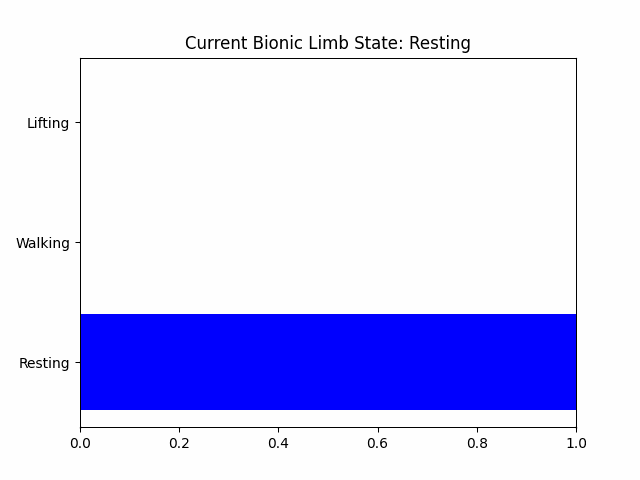

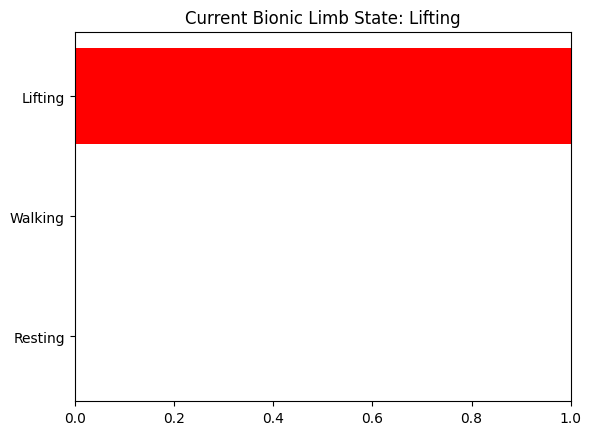

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from time import sleep
import os

# Simulated EMG Signal Data (0 = Rest, 1 = Walk, 2 = Lift)
emg_signal = np.random.choice([0, 1, 2], size=20)

# State Definitions
state_dict = {0: 'Resting', 1: 'Walking', 2: 'Lifting'}

# Directory to save frames
if not os.path.exists('frames'):
    os.makedirs('frames')

# Simulated Bionic Arm Class
class BionicLimb:
    def __init__(self):
        self.state = 'Resting'

    def process_emg(self, emg_value):
        self.state = state_dict.get(emg_value, 'Resting')
        return self.state

# Visualization for demonstration
def create_image(state, frame_num):
    actions = ['Resting', 'Walking', 'Lifting']
    plt.clf()  # Clear the previous plot
    plt.barh(actions, [1 if actions[i] == state else 0 for i in range(len(actions))], color=['blue', 'green', 'red'])
    plt.title(f"Current Bionic Limb State: {state}")
    plt.xlim(0, 1)
    plt.savefig(f'frames/frame_{frame_num:03d}.png')  # Save frame as an image

# Instantiate the Bionic Limb
bionic_limb = BionicLimb()

# Simulate Bionic Arm/Leg Control and Generate Frames
for frame_num, signal in enumerate(emg_signal):
    state = bionic_limb.process_emg(signal)
    create_image(state, frame_num)
    sleep(0.1)

# Convert images to a video using imageio
frames = []
for frame_num in range(len(emg_signal)):
    filename = f'frames/frame_{frame_num:03d}.png'
    frames.append(imageio.imread(filename))

imageio.mimsave('bionic_limb_simulation.gif', frames, fps=2)

# Display the final gif animation
from IPython.display import Image
Image(filename='bionic_limb_simulation.gif')


In [ ]:
!pip install opencv-python matplotlib imageio


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Initialize Video Writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('bionic_system_simulation.mp4', fourcc, 1.0, (640, 480))

# Simulated EMG Signal Data (0 = Rest, 1 = Walk, 2 = Lift)
emg_signal = np.random.choice([0, 1, 2], size=20)

# State Definitions
state_dict = {0: 'Resting', 1: 'Walking', 2: 'Lifting'}

# Create Frames Showing Person Response and System's Action
for signal in emg_signal:
    person_response = "Person: " + ("Moving Arm" if signal != 0 else "At Rest")
    system_output = "System: " + state_dict[signal]

    # Create a blank frame (black background)
    frame = np.zeros((480, 640, 3), dtype=np.uint8)

    # Draw Text for Person Response and System Output
    cv2.putText(frame, person_response, (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, system_output, (50, 300), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Simulate a graphical representation (e.g., arm movement)
    if signal == 1:  # Walking
        cv2.line(frame, (320, 240), (320, 100), (0, 255, 0), 5)  # Simulate arm lifting
    elif signal == 2:  # Lifting
        cv2.line(frame, (320, 240), (400, 240), (0, 0, 255), 5)  # Simulate arm moving right
    else:
        cv2.circle(frame, (320, 240), 50, (255, 0, 0), 5)  # Simulate resting state

    # Write the frame to the video
    out.write(frame)

# Release Video Writer
out.release()

# Display the video in Colab
from IPython.display import Video
Video('bionic_system_simulation.mp4')


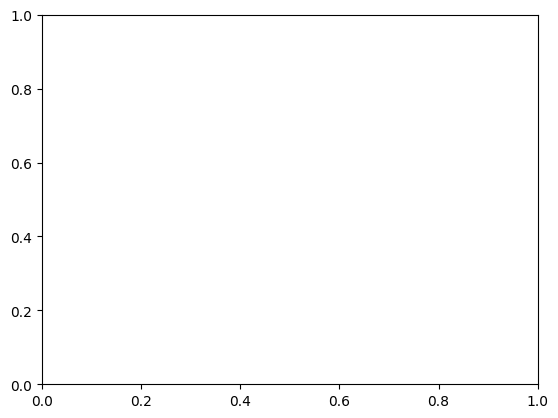

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize Video Writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('complex_bionic_simulation.mp4', fourcc, 1.0, (640, 480))

# EMG Signal Data Simulation
emg_signal = np.random.choice([0, 1, 2], size=50)
time_steps = np.linspace(0, 10, 50)

# State Definitions
state_dict = {0: 'Resting', 1: 'Walking', 2: 'Lifting', 3: 'Gripping', 4: 'Rotating'}

# Create a dynamic EMG signal graph (real-time plot)
fig, ax = plt.subplots()

def update_emg_graph(i):
    ax.clear()
    ax.plot(time_steps[:i], emg_signal[:i])
    ax.set_title("Real-Time EMG Signal")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Signal Strength")
    ax.set_ylim(0, 2)

ani = animation.FuncAnimation(fig, update_emg_graph, frames=len(time_steps), repeat=False)
plt.show()

# Create Frames Showing Person Response and System's Action
for idx, signal in enumerate(emg_signal):
    person_response = "Person: " + ("Moving Arm" if signal != 0 else "At Rest")
    system_output = "System: " + state_dict[signal]

    # Create a blank frame (black background)
    frame = np.zeros((480, 640, 3), dtype=np.uint8)

    # Draw Text for Person Response and System Output
    cv2.putText(frame, person_response, (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, system_output, (50, 300), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Simulate a graphical representation of different bionic movements
    if signal == 1:  # Walking
        cv2.line(frame, (320, 240), (320, 100), (0, 255, 0), 5)  # Simulate arm lifting
    elif signal == 2:  # Lifting
        cv2.line(frame, (320, 240), (400, 240), (0, 0, 255), 5)  # Simulate arm moving right
    elif signal == 3:  # Gripping
        cv2.rectangle(frame, (290, 220), (350, 300), (255, 0, 0), 5)  # Simulate gripping motion
    elif signal == 4:  # Rotating
        cv2.circle(frame, (320, 240), 50, (255, 255, 0), 5)  # Simulate rotating motion
    else:  # Resting
        cv2.circle(frame, (320, 240), 50, (255, 0, 0), 5)  # Simulate resting state

    # Write the frame to the video
    out.write(frame)

# Release Video Writer
out.release()

# Display the video in Colab
from IPython.display import Video
Video('complex_bionic_simulation.mp4')


BIONICS CREATED BY BIO PIONEERS TEAM  USING